##### Dataset Details
PaySim synthesizes mobile money transactions using data derived from a month's worth of financial logs from a mobile money service operating in an African country. These logs were provided by a multinational company that offers this financial service across more than 14 countries globally.

This synthetic dataset has been scaled to one-quarter the size of the original dataset and is specifically tailored for Kaggle.

Important Note: Transactions identified as fraudulent are annulled. Hence, for fraud detection analysis, the following columns should not be utilized: oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest.



# weak 1

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from category_encoders import OneHotEncoder
from warnings import filterwarnings
filterwarnings('ignore')

In [37]:
df = pd.read_csv('Synthetic_Financial_datasets_log.csv')
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Printing & Understanding the Data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [39]:
columns_to_drop = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','nameDest', 'nameOrig']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# Statistical analysis

In [40]:
df.shape

(6362620, 5)

In [41]:
df.describe()

,step,amount,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,1.000000e+00,1.000000e+00


####  Check for Dtypes

In [42]:
dtypes = df.dtypes
numUniq = df.nunique()
pd.DataFrame({'Dtypes': dtypes, 'NumOfUniques': numUniq}).T

,step,type,amount,isFraud,isFlaggedFraud
Dtypes,int64,object,float64,int64,int64
NumOfUniques,743,5,5316900,2,2


In [43]:
for i in df.type: 
    if type(i) != str : 
        print("found a wrong value")

In [44]:
cols= df.select_dtypes('number').columns.tolist()
print(cols)
for col in cols :
    for i in df[col]:
        if type(i) == str and i.isnumeric() == False: 
            print(i)

['step', 'amount', 'isFraud', 'isFlaggedFraud']


In [45]:
cols = ['type','isFraud']
df[cols] = df[cols].astype('category')
dtypes = df.dtypes
numUniq = df.nunique()
pd.DataFrame({'Dtypes': dtypes, 'NumOfUniques': numUniq}).T

,step,type,amount,isFraud,isFlaggedFraud
Dtypes,int64,category,float64,category,int64
NumOfUniques,743,5,5316900,2,2


In [46]:
df.isna().sum()

step              0
type              0
amount            0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [47]:
df.duplicated().sum()

7594

In [48]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [49]:
cols= df.select_dtypes('category').columns.tolist()
print(f'categorical columns is: {cols}')

for col in cols :
    print(f'- coulmn of {col}')
    print(df[col].value_counts())
    print('-------------------------------------')
    

categorical columns is: ['type', 'isFraud']
- coulmn of type
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
-------------------------------------
- coulmn of isFraud
isFraud
0    6354407
1       8213
Name: count, dtype: int64
-------------------------------------


# data reduction

In [50]:
df_type_0 = df[df['isFraud'] == 0]


sampled_data = df_type_0.sample(n=9000, random_state=42)

df_remaining = df[df['isFraud'] != 0]

df= pd.concat([df_remaining, sampled_data], ignore_index=True)



In [51]:
cols= df.select_dtypes('category').columns.tolist()
print(f'categorical columns is: {cols}')

for col in cols :
    print(f'- coulmn of {col}')
    print(df[col].value_counts())
    print('-------------------------------------')

categorical columns is: ['type', 'isFraud']
- coulmn of type
type
CASH_OUT    7356
TRANSFER    4808
PAYMENT     2995
CASH_IN     2001
DEBIT         53
Name: count, dtype: int64
-------------------------------------
- coulmn of isFraud
isFraud
0    9000
1    8213
Name: count, dtype: int64
-------------------------------------


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17213 entries, 0 to 17212
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   step            17213 non-null  int64   
 1   type            17213 non-null  category
 2   amount          17213 non-null  float64 
 3   isFraud         17213 non-null  category
 4   isFlaggedFraud  17213 non-null  int64   
dtypes: category(2), float64(1), int64(2)
memory usage: 437.5 KB


# Visualize our data 
* A. Data Distribution Graphs
>> Numerical Data Distribution

1. Histogram

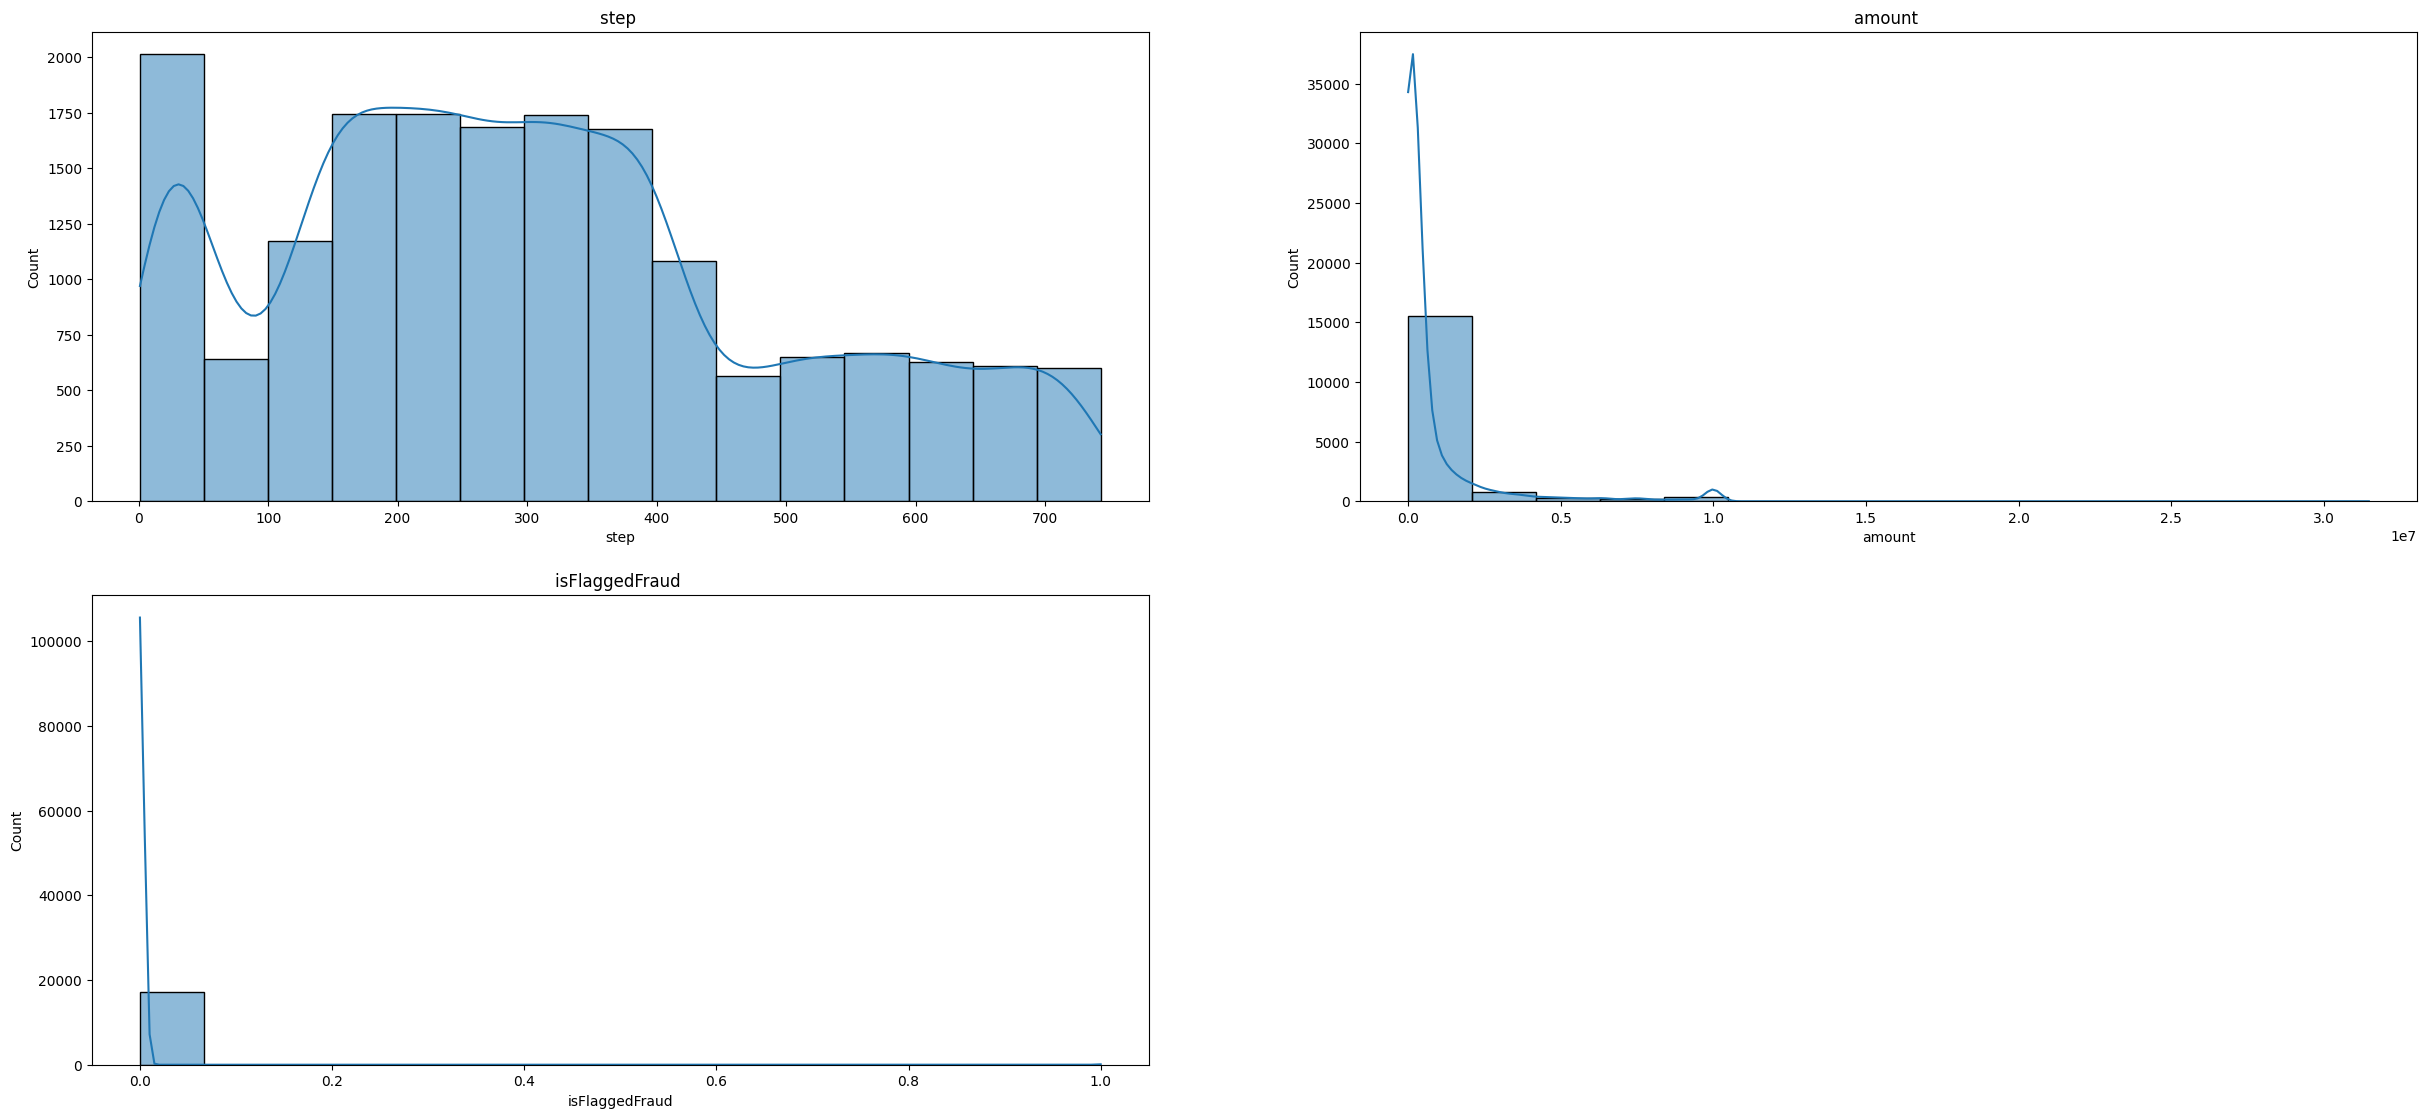

In [53]:
numCol = df.select_dtypes('number').columns
plt.figure(figsize=(30,50))
for i, col in enumerate(numCol):
    plt.subplot(7, 2, i+1)
    sns.histplot(df[col] , kde=True , bins=15)
    plt.title(f"{col} ")
plt.show()

2. Pie Plot

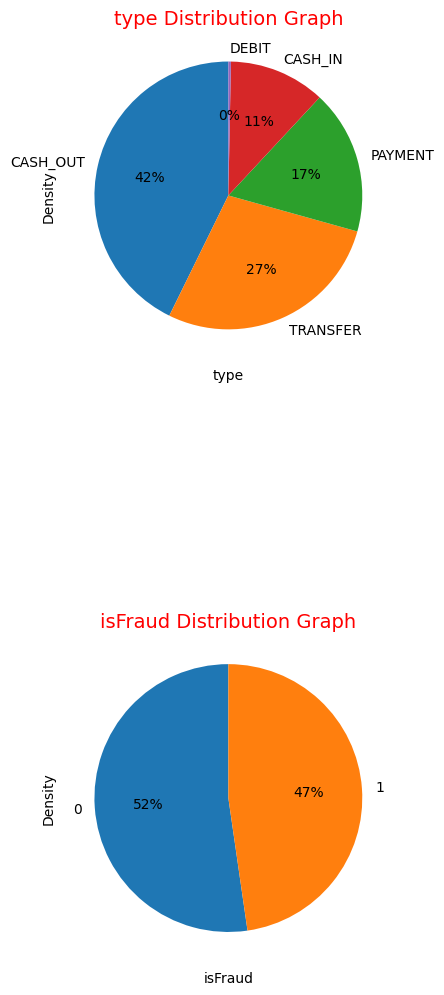

In [54]:
numCol = df.select_dtypes('category').columns
plt.figure(figsize=(5,20))
for i, col in enumerate(numCol):
    plt.subplot(3, 1, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories, autopct="%1.1d%%", startangle=90)
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph",pad=2.1, fontdict={'color':'red','fontsize':14})
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

* B. Outlier Detection Graphs

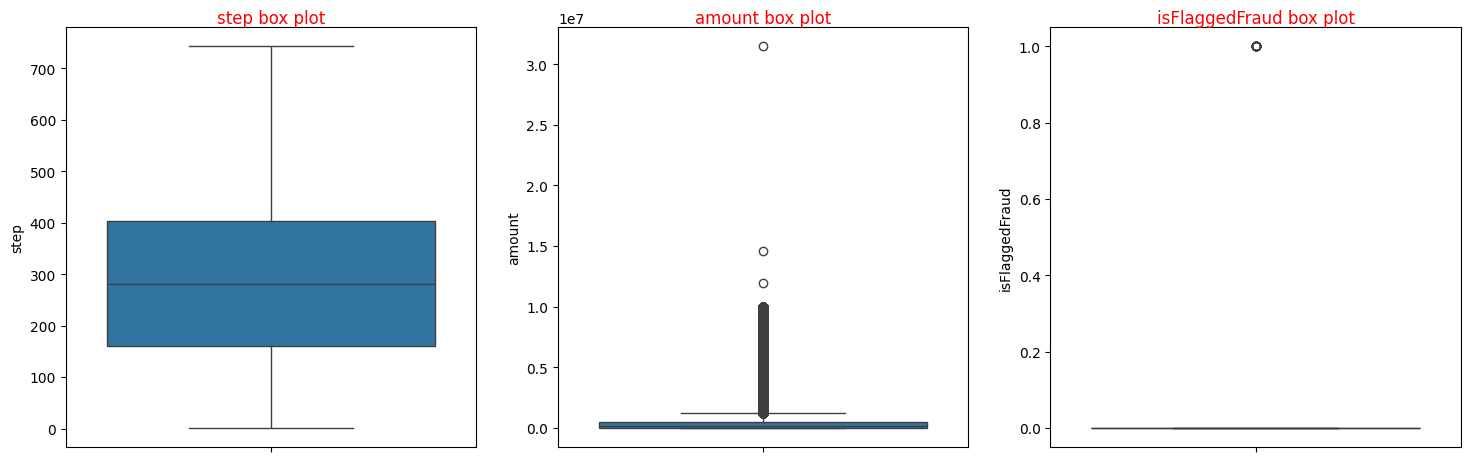

In [55]:
numCol = df.select_dtypes('number').columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(numCol):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col], orient='v')
    plt.title(f"{col} box plot",pad=2.1, fontdict={'color':'red','fontsize':12})
plt.show()

In [56]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,1,0
1,1,CASH_OUT,181.0,1,0
2,1,TRANSFER,2806.0,1,0
3,1,CASH_OUT,2806.0,1,0
4,1,TRANSFER,20128.0,1,0


* C. Relationship Graphs: 
>>(Bivariate Analysis)

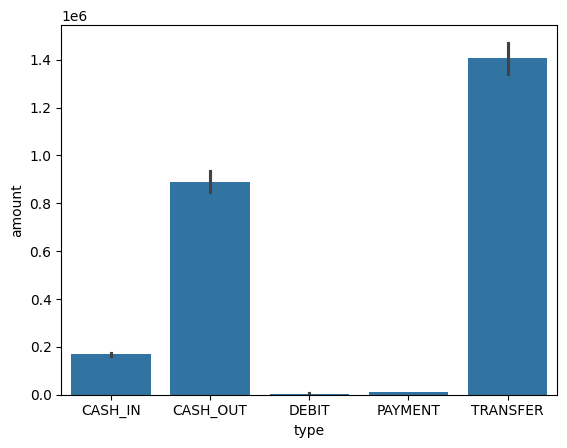

In [57]:
plt.figure()
sns.barplot(x='type', y='amount', data=df)
plt.show()

>> (Multivariate Analysis)

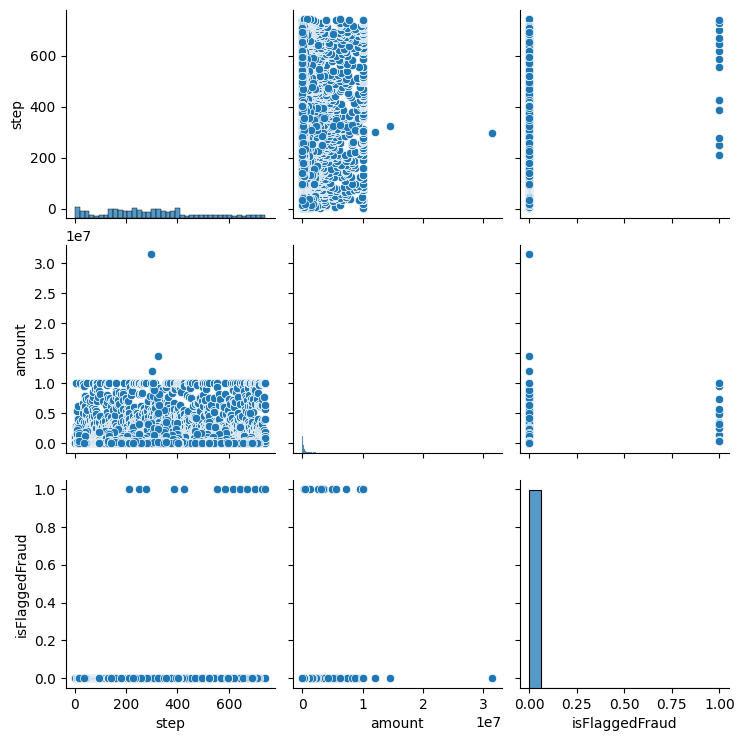

In [58]:
sns.pairplot(df)

In [59]:
numeric_columns = df.select_dtypes('number').columns
numeric_data = df[numeric_columns]

correlation = numeric_data.corr()

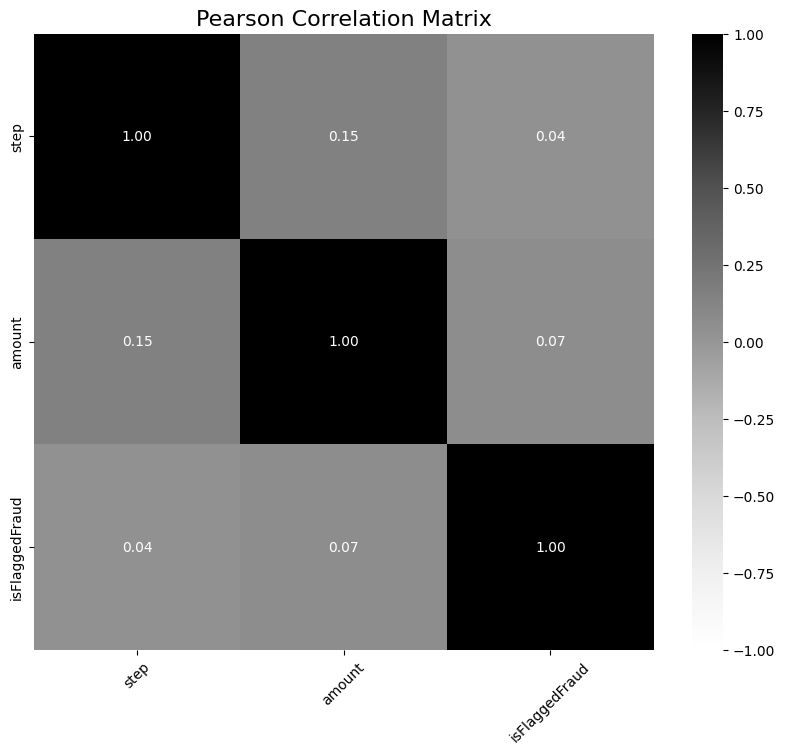

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

>> Handle Outliers

In [61]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,1,0
1,1,CASH_OUT,181.0,1,0
2,1,TRANSFER,2806.0,1,0
3,1,CASH_OUT,2806.0,1,0
4,1,TRANSFER,20128.0,1,0


In [62]:
def downcast_numeric(df):
    """Downcast numerical columns to the smallest possible dtype."""
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    for col in num_cols:
        if pd.api.types.is_integer_dtype(df[col]):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif pd.api.types.is_float_dtype(df[col]):
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

df = downcast_numeric(df)


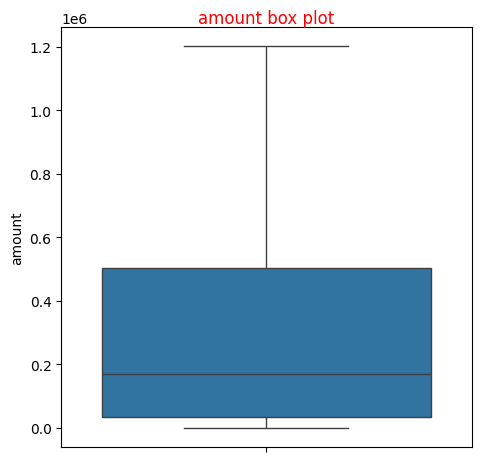

In [63]:

import gc

numCol = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Outlier Handling using clip
for col in numCol:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENCE = Q3 + 1.5 * IQR
    LO_FENCE = Q1 - 1.5 * IQR
    
    # Apply clipping
    df[col] = df[col].clip(lower=LO_FENCE, upper=UP_FENCE)
    
    # Optional: Delete intermediate variables and collect garbage
    del Q1, Q3, IQR, UP_FENCE, LO_FENCE
    gc.collect()

# Plotting Boxplots
plt.figure(figsize=(18, 12))
for i, col in enumerate(numCol):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col], orient='v')
    plt.title(f"{col} box plot",pad=2.1, fontdict={'color':'red','fontsize':12})
plt.show()


>> Normalization

In [64]:
from sklearn.preprocessing import StandardScaler
numCol = df.select_dtypes('number').columns
scaler = StandardScaler()
scaler.fit(df[numCol])
df[numCol] = scaler.transform(df[numCol])

df.head(10)

,step,type,amount,isFraud,isFlaggedFraud
0,-1.577637,TRANSFER,-0.848947,1,-0.030502
1,-1.577637,CASH_OUT,-0.848947,1,-0.030502
2,-1.577637,TRANSFER,-0.842747,1,-0.030502
3,-1.577637,CASH_OUT,-0.842747,1,-0.030502
4,-1.577637,TRANSFER,-0.801832,1,-0.030502
5,-1.577637,CASH_OUT,-0.801832,1,-0.030502
6,-1.577637,CASH_OUT,0.133220,1,-0.030502
7,-1.577637,TRANSFER,1.987688,1,-0.030502
8,-1.577637,CASH_OUT,1.987688,1,-0.030502
9,-1.577637,TRANSFER,-0.766554,1,-0.030502


>> Encoding

In [65]:
strCol = ['type']
encoder = OneHotEncoder(cols = strCol, drop_invariant= True)
df = encoder.fit_transform(df)

df.head(10)

,step,type_1,type_2,type_3,type_4,type_5,amount,isFraud,isFlaggedFraud
0,-1.577637,1,0,0,0,0,-0.848947,1,-0.030502
1,-1.577637,0,1,0,0,0,-0.848947,1,-0.030502
2,-1.577637,1,0,0,0,0,-0.842747,1,-0.030502
3,-1.577637,0,1,0,0,0,-0.842747,1,-0.030502
4,-1.577637,1,0,0,0,0,-0.801832,1,-0.030502
5,-1.577637,0,1,0,0,0,-0.801832,1,-0.030502
6,-1.577637,0,1,0,0,0,0.133220,1,-0.030502
7,-1.577637,1,0,0,0,0,1.987688,1,-0.030502
8,-1.577637,0,1,0,0,0,1.987688,1,-0.030502
9,-1.577637,1,0,0,0,0,-0.766554,1,-0.030502


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17213 entries, 0 to 17212
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   step            17213 non-null  float64 
 1   type_1          17213 non-null  int64   
 2   type_2          17213 non-null  int64   
 3   type_3          17213 non-null  int64   
 4   type_4          17213 non-null  int64   
 5   type_5          17213 non-null  int64   
 6   amount          17213 non-null  float64 
 7   isFraud         17213 non-null  category
 8   isFlaggedFraud  17213 non-null  float64 
dtypes: category(1), float64(3), int64(5)
memory usage: 1.1 MB


>> split the data

In [67]:
from sklearn.model_selection import train_test_split

X1=df.drop(['isFraud'] ,axis=1)
y1=df['isFraud']


In [68]:

# Split the data into train and test split
X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

>> resolve the unblanced data

In [69]:
from imblearn.over_sampling import ADASYN
from collections import Counter
import pandas as pd


adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)

X_train_res, y_train_res = adasyn.fit_resample(X1_train, y1_train)




print(X_train_res.shape)
print(y_train_res.shape)

(13965, 8)
(13965,)


# weak 2

# Logistic Regression

Accuracy: 83.44%
classification report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1799
           1       0.80      0.87      0.83      1644

    accuracy                           0.83      3443
   macro avg       0.84      0.84      0.83      3443
weighted avg       0.84      0.83      0.83      3443

Confusion Matrix:
: [[1437  362]
 [ 208 1436]]


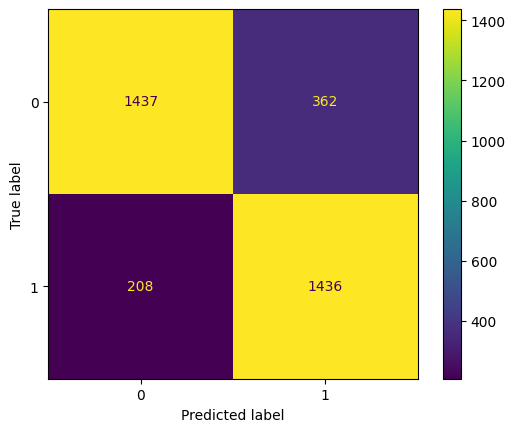

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,ConfusionMatrixDisplay

logreg=LogisticRegression()
logreg.fit(X_train_res, y_train_res)

y_predlog = logreg.predict(X1_test)


accuracy = accuracy_score(y1_test, y_predlog)
print(f"Accuracy: {accuracy * 100:.2f}%")



print("classification report:")
print(classification_report(y1_test, y_predlog))

print(f"Confusion Matrix:\n: {confusion_matrix(y1_test, y_predlog)}")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y1_test, y_predlog),
                              display_labels=logreg.classes_)
disp.plot()
plt.show()

# Random Forest Classifier

Accuracy: 88.82%
classification report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1799
           1       0.88      0.88      0.88      1644

    accuracy                           0.89      3443
   macro avg       0.89      0.89      0.89      3443
weighted avg       0.89      0.89      0.89      3443

Confusion Matrix:
: [[1608  191]
 [ 194 1450]]


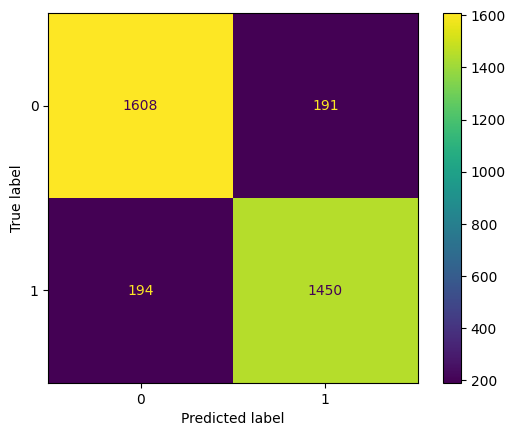

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier(n_estimators=100, random_state=42)
rfModel.fit(X_train_res, y_train_res)
y_predRF = rfModel.predict(X1_test)


accuracy = accuracy_score(y1_test, y_predRF)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("classification report:")
print(classification_report(y1_test, y_predRF))


print(f"Confusion Matrix:\n: {confusion_matrix(y1_test, y_predRF)}")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y1_test, y_predRF),
                              display_labels=rfModel.classes_)
disp.plot()
plt.show()

# BaggingClassifier

Accuracy: 89.11%
classification report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1799
           1       0.88      0.89      0.89      1644

    accuracy                           0.89      3443
   macro avg       0.89      0.89      0.89      3443
weighted avg       0.89      0.89      0.89      3443

Confusion Matrix:
: [[1597  202]
 [ 173 1471]]


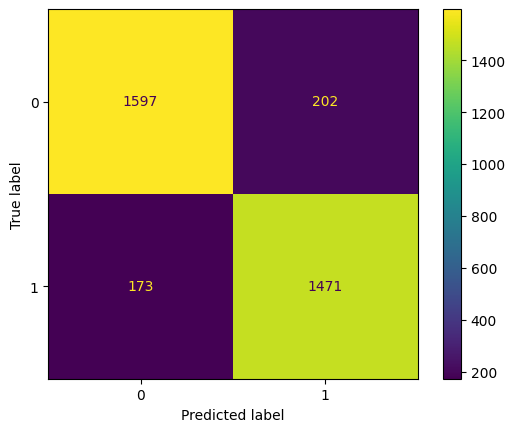

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

baggingModel = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,random_state=42)
baggingModel.fit(X_train_res, y_train_res)
y_predBagging = baggingModel.predict(X1_test) 


accuracy = accuracy_score(y1_test, y_predBagging)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("classification report:")
print(classification_report(y1_test, y_predBagging))


print(f"Confusion Matrix:\n: {confusion_matrix(y1_test, y_predBagging)}")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y1_test, y_predBagging),
                              display_labels=baggingModel.classes_)
disp.plot()
plt.show()


# DecisionTreeClassifier

Accuracy: 87.63%
classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1799
           1       0.88      0.85      0.87      1644

    accuracy                           0.88      3443
   macro avg       0.88      0.88      0.88      3443
weighted avg       0.88      0.88      0.88      3443

Confusion Matrix:
: [[1612  187]
 [ 239 1405]]


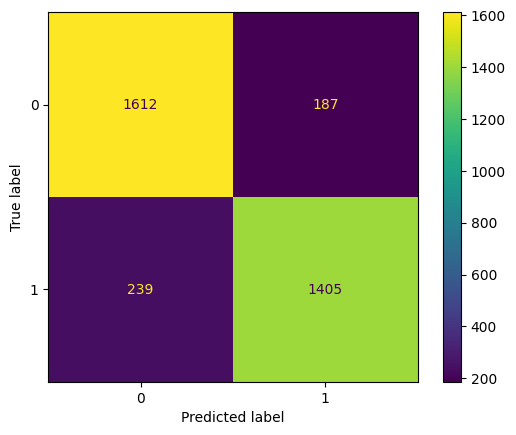

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,ConfusionMatrixDisplay

DecTreemodel= DecisionTreeClassifier(max_depth=5)
DecTreemodel.fit(X_train_res, y_train_res)
y_preddec=DecTreemodel.predict(X1_test)


accuracy = accuracy_score(y1_test, y_preddec)
print(f"Accuracy: {accuracy * 100:.2f}%")



print("classification report:")
print(classification_report(y1_test, y_preddec))

print(f"Confusion Matrix:\n: {confusion_matrix(y1_test, y_preddec)}")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y1_test, y_preddec),
                              display_labels=DecTreemodel.classes_)
disp.plot()
plt.show()

# Ada Boost Classifier

Accuracy: 86.90%
classification report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1799
           1       0.86      0.87      0.86      1644

    accuracy                           0.87      3443
   macro avg       0.87      0.87      0.87      3443
weighted avg       0.87      0.87      0.87      3443

Confusion Matrix:
: [[1567  232]
 [ 219 1425]]


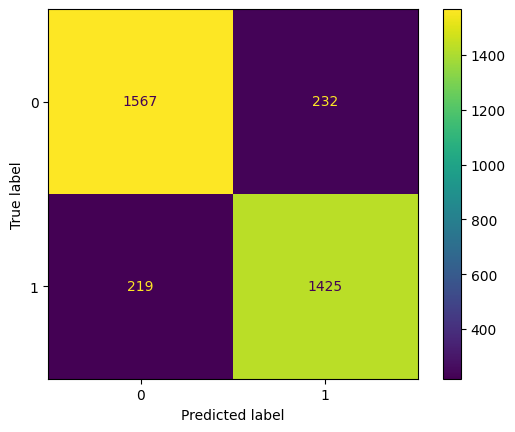

In [74]:
from sklearn.ensemble import AdaBoostClassifier

boostNodel = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100,random_state=42)
boostNodel.fit(X_train_res, y_train_res)
y_predBoosting = boostNodel.predict(X1_test) 


accuracy = accuracy_score(y1_test, y_predBoosting)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("classification report:")
print(classification_report(y1_test, y_predBoosting))


print(f"Confusion Matrix:\n: {confusion_matrix(y1_test, y_predBoosting)}")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y1_test, y_predBoosting),
                              display_labels=boostNodel.classes_)
disp.plot()
plt.show()

# NLP Part

In [75]:
import string
import numpy as np 
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp-01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp-01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp-01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

>> Load the Data

In [76]:
from datasets import load_dataset

dataset = load_dataset("thibautweber/fraud_detection5")
df = pd.DataFrame(dataset['train'])
df.head()

,instruction,output
0,This transaction occurred on 2023-01-22 03:56:...,The transaction is Fraudulent because it happe...
1,"At the time of this transaction, 2023-01-22 03...",The transaction is Fraudulent because it happe...
2,"On this day, a transaction took place 2023-01-...",The transaction is Fraudulent because it happe...
3,This transaction occurred on 2023-01-22 00:40:...,The transaction is Fraudulent because it happe...
4,Here are the details of the transaction that o...,"Fraudulent because of the big expense, around ..."


>> Rename the Column & convert the target to label

In [77]:
df = df.rename(columns={'instruction': 'description', 'output': 'Is_Fraud'})
df['Is_Fraud'] = np.where(df['Is_Fraud'] == 'Not Fraudulent', 0, 1)
df.head(10)


,description,Is_Fraud
0,This transaction occurred on 2023-01-22 03:56:...,1
1,"At the time of this transaction, 2023-01-22 03...",1
2,"On this day, a transaction took place 2023-01-...",1
3,This transaction occurred on 2023-01-22 00:40:...,1
4,Here are the details of the transaction that o...,1
5,"During this transaction, 2023-01-23 23:38:25. ...",1
6,Here are the details of the transaction that o...,1
7,Encountering a transaction on 2023-11-24 15:43...,0
8,Witnessing the event on 2023-10-18 23:10:12. T...,0
9,Witnessing the event on 2023-10-26 15:46:30. T...,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1000 non-null   object
 1   Is_Fraud     1000 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 11.8+ KB


In [79]:
x=(df['Is_Fraud']==0)
x.sum()

926

In [80]:
x=(df['Is_Fraud']==1)
x.sum()

74

>> Check Missing values

In [81]:
df.isnull().sum()

description    0
Is_Fraud       0
dtype: int64

>> Check Duplicate values

In [82]:
df.duplicated().sum()

0

>> Percentage of Fraud

In [83]:
values = df['Is_Fraud'].value_counts()
values

Is_Fraud
0    926
1     74
Name: count, dtype: int64

In [84]:

total = values.sum()
percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)


percentage of 0 : 92.60000000000001
percentage of 1 : 7.3999999999999995


Total class distribution (1 and 0):
Is_Fraud
1    926
0    926
Name: count, dtype: int64


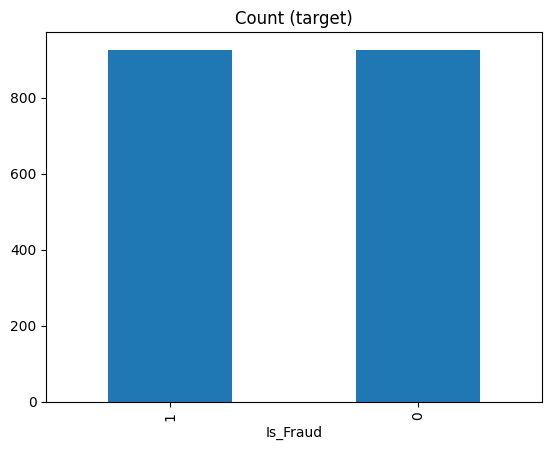

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
# Separate the classes
class_0 = df[df['Is_Fraud'] == 0]
class_1 = df[df['Is_Fraud'] == 1]

# Get the count of class 0
class_count_0 = class_0.shape[0]

# Over-sample class 1 to match the count of class 0 (with replacement)
class_1_over = class_1.sample(class_count_0, replace=True)

# Concatenate the over-sampled class 1 with class 0
df2 = pd.concat([class_1_over, class_0], axis=0)

# Check the distribution of the classes after over-sampling
print("Total class distribution (1 and 0):")
print(df2['Is_Fraud'].value_counts())

# Plot the distribution
df2['Is_Fraud'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()


In [86]:
values = df2['Is_Fraud'].value_counts()
values

Is_Fraud
1    926
0    926
Name: count, dtype: int64

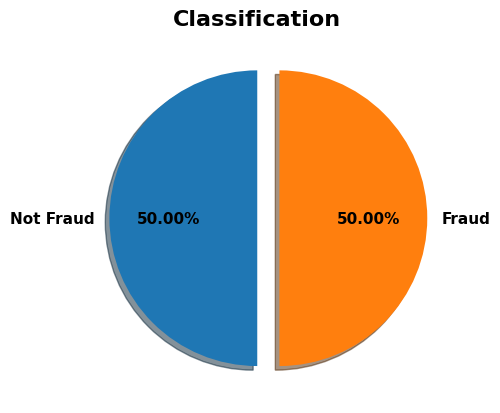

In [87]:
# fig, ax = plt.subplots(figsize=(4, 4))

wedges, texts, autotexts = plt.pie(
    values, labels=['Not Fraud', 'Fraud'],
    autopct='%0.2f%%',
    startangle=90,
    explode=(0, 0.15),
    shadow=True  
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=11, weight='bold')
    autotext.set(size=11, weight='bold')

plt.title('Classification', fontsize=16, fontweight='bold')

plt.show()

>> Text Length and Structure Analysis

In [88]:
df2['num_characters'] = df2['description'].apply(len)
df2['num_words'] = df2['description'].apply(lambda x: len(nltk.word_tokenize(x)))
df2['num_sentence'] = df2['description'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [89]:
df2[['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,1852.000000,1852.000000,1852.0
mean,181.644708,31.929266,2.0
std,12.760738,2.750938,0.0
min,157.000000,28.000000,2.0
25%,172.000000,29.000000,2.0
50%,181.000000,32.000000,2.0
75%,189.000000,33.000000,2.0
max,218.000000,38.000000,2.0


>> Character Length Distribution for descriptions

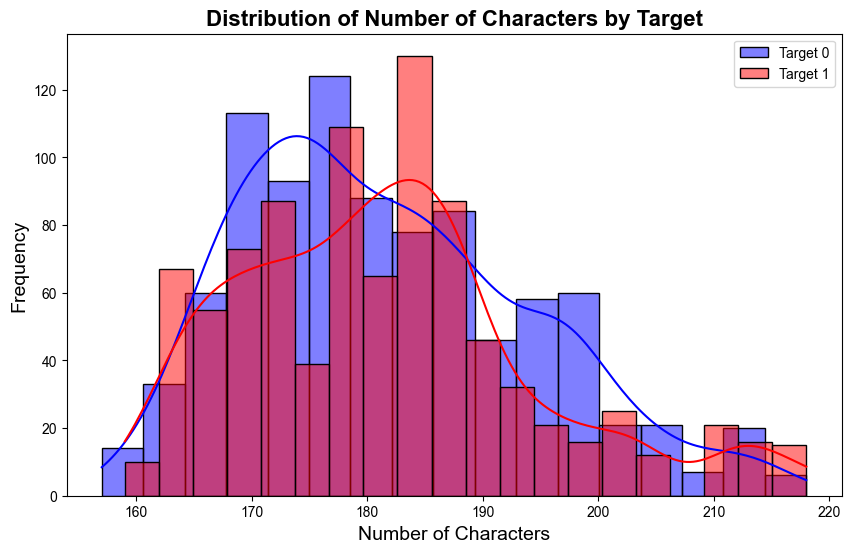

In [90]:
# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df2[df2['Is_Fraud'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df2[df2['Is_Fraud'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

>> Word Length Distribution for descriptions

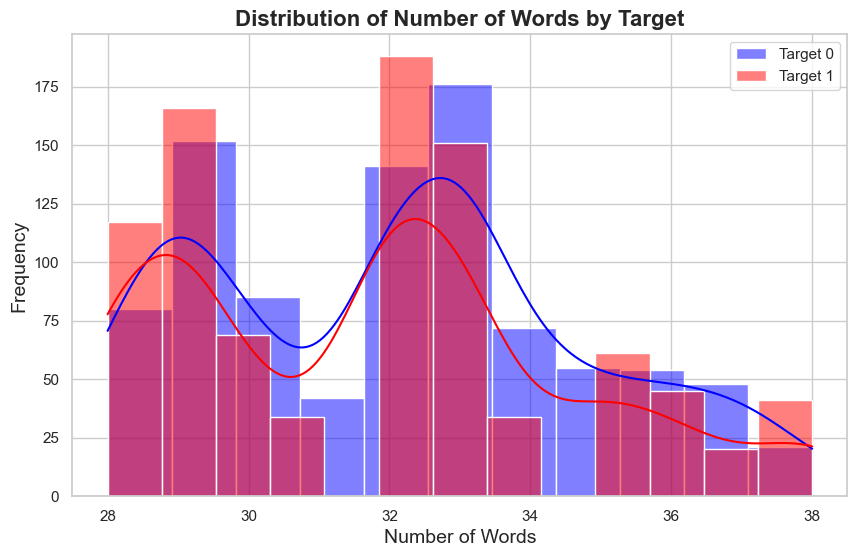

In [91]:

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df2[df2['Is_Fraud'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df2[df2['Is_Fraud'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

>> Pairplot for Data Visualization


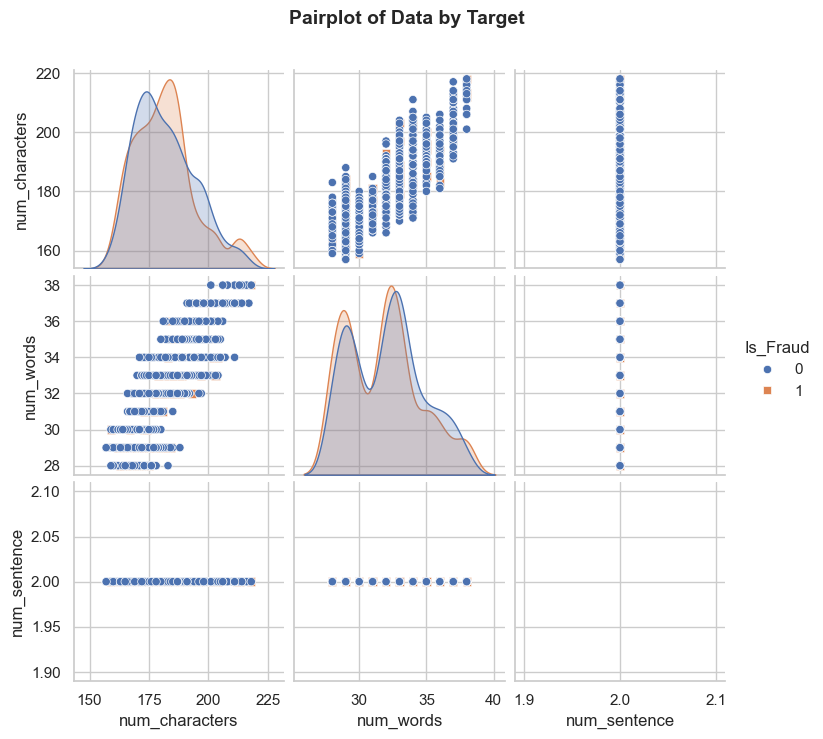

In [92]:
# sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df2, hue='Is_Fraud', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.90)  # Adjust the position of the title


plt.show()

>> Coorelation

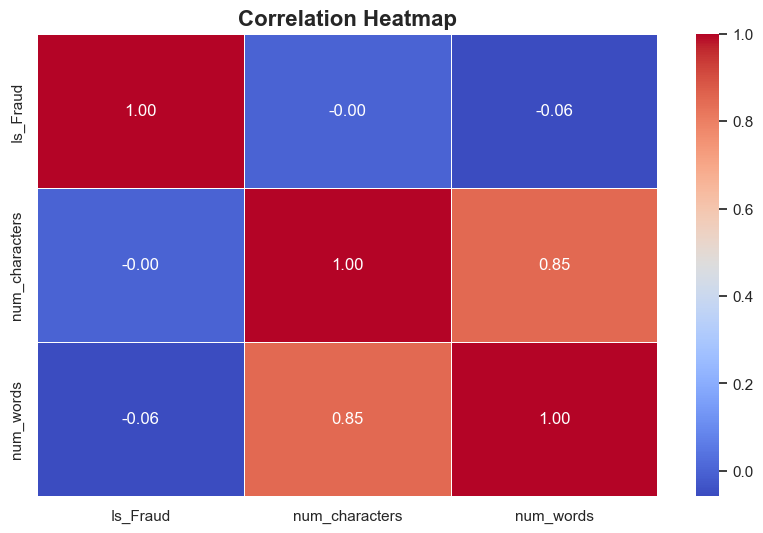

In [93]:
correlation_matrix = df2[['Is_Fraud', 'num_characters', 'num_words']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
# sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Show the heatmap
plt.show()


>> Data Preprocessing

In [94]:
# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

>> Creating a New Column: 'transformed_text'

In [95]:
df2['transformed_text'] = df2['description'].apply(transform_text)

In [96]:
df2.head(10).style

,description,Is_Fraud,num_characters,num_words,num_sentence,transformed_text
285,This transaction occurred on 2023-04-20 22:04:35. The amount of $290.29 was spent in the category 'health_fitness' at the merchant 'fraud_Ratke and Sons' located in New Brandon.,1,177,31,2,transact occur amount spent categori merchant son locat new brandon
944,This transaction occurred on 2023-07-02 22:39:06. The amount of $691.09 was spent in the category 'kids_pets' at the merchant 'fraud_Goyette-Gerhold' located in Taylorburgh.,1,173,28,2,transact occur amount spent categori merchant locat taylorburgh
287,"Here are the details of the transaction that occurred 2023-04-20 22:54:04. The amount of $699.01 was spent in the category 'shopping_pos' at the merchant 'fraud_Quitzon, Green and Bashirian' located in Jonestown.",1,212,37,2,detail transact occur amount spent categori merchant green bashirian locat jonestown
566,"Here are the details of the transaction that occurred 2023-04-02 02:10:45. The amount of $9.75 was spent in the category 'grocery_pos' at the merchant 'fraud_Rowe, Batz and Goodwin' located in West Jennifermouth.",1,212,38,2,detail transact occur amount spent categori merchant batz goodwin locat west jennifermouth
287,"Here are the details of the transaction that occurred 2023-04-20 22:54:04. The amount of $699.01 was spent in the category 'shopping_pos' at the merchant 'fraud_Quitzon, Green and Bashirian' located in Jonestown.",1,212,37,2,detail transact occur amount spent categori merchant green bashirian locat jonestown
392,Encountering a transaction on 2023-09-17 22:23:29. The amount of $873.08 was spent in the category 'misc_net' at the merchant 'fraud_Huel-Langworth' located in Jamesstad.,1,170,28,2,encount transact amount spent categori merchant locat jamesstad
945,"At the time of this transaction, 2023-07-02 22:45:34. The amount of $9.09 was spent in the category 'shopping_pos' at the merchant 'fraud_Stoltenberg-Beatty' located in Allisonberg.",1,181,31,2,time transact amount spent categori merchant locat allisonberg
348,"At the time of this transaction, 2023-10-25 23:14:12. The amount of $324.9 was spent in the category 'shopping_net' at the merchant 'fraud_Labadie, Treutel and Bode' located in West Taylor.",1,189,36,2,time transact amount spent categori merchant treutel bode locat west taylor
947,"During this transaction, 2023-07-01 22:07:57. The amount of $21.57 was spent in the category 'misc_net' at the merchant 'fraud_Lebsack and Sons' located in Jonesmouth.",1,167,30,2,transact amount spent categori merchant son locat jonesmouth
4,Here are the details of the transaction that occurred 2023-01-22 13:06:24. The amount of $1105.5 was spent in the category 'shopping_net' at the merchant 'fraud_Gleason-Macejkovic' located in Nicolefort.,1,203,33,2,detail transact occur amount spent categori merchant locat nicolefort


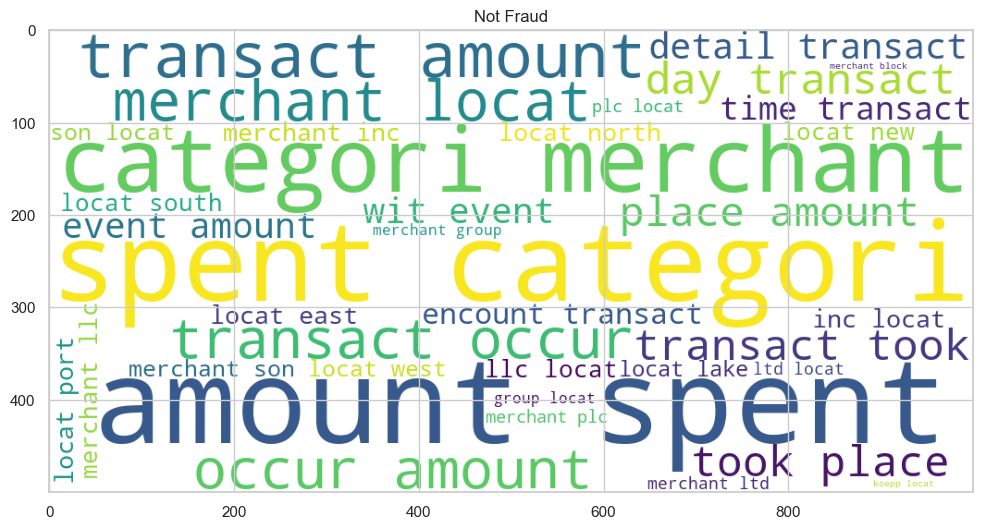

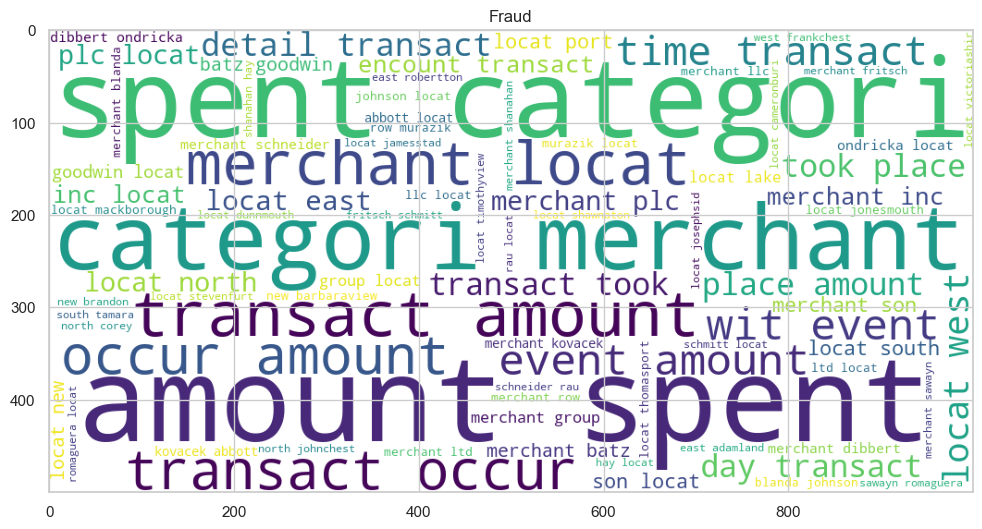

In [97]:
lable = ["Not Fraud", "Fraud"]
for x in range(2):
    wc = WordCloud(width = 1000, height = 500, min_font_size = 10, background_color = 'white')
    spam_wc = wc.generate(df2[df2['Is_Fraud'] == x]['transformed_text'].str.cat(sep = " "))
    plt.figure(figsize = (15,6))
    plt.imshow(spam_wc)
    plt.title(lable[x])
    plt.show()


>> Model Building

In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [99]:
X = tfid.fit_transform(df2['transformed_text']).toarray()
y = df2['Is_Fraud'].values

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [102]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    


In [103]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt
    
}

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
def train_classifier(clfs, X_train,y_train, X_test, y_test):
    clfs.fit(X_train,  y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    classification_re = classification_report(y_test, y_pred, zero_division=1)
   
    return accuracy , precision, recall, f1, classification_re

>> Evaluate the Models

In [105]:
from collections import Counter
print(Counter(y_train))  # For the training labels
print(Counter(y_test))   # For the testing labels

Counter({1: 741, 0: 740})
Counter({0: 186, 1: 185})


In [106]:
def Model_Report(clfs, X_train, X_test , y_train, y_test):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    classification_re_score = []
    for name , clf in clfs.items():
        current_accuracy, current_precision, current_recall, current_f1, classification_re = train_classifier(clf, X_train, y_train, X_test, y_test)
        print()
        print("For: ", name)
        print("Accuracy: ", current_accuracy)
        print("Precision: ", current_precision)
        print("recall: ", current_recall)
        print("f1: ", current_f1)
        print("classification report:")
        print(classification_re)
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        recall_scores.append(current_recall)
        f1_scores.append(current_f1)
        classification_re_score.append(classification_re)

In [107]:
Model_Report(clfs, X_train, X_test , y_train, y_test)


For:  SVC
Accuracy:  0.9811320754716981
Precision:  0.9818199685534591
recall:  0.9811320754716981
f1:  0.9811263165760896
classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       186
           1       0.96      1.00      0.98       185

    accuracy                           0.98       371
   macro avg       0.98      0.98      0.98       371
weighted avg       0.98      0.98      0.98       371


For:  KNN
Accuracy:  0.7439353099730458
Precision:  0.8308144012321911
recall:  0.7439353099730458
f1:  0.7261824457058148
classification report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66       186
           1       0.66      1.00      0.80       185

    accuracy                           0.74       371
   macro avg       0.83      0.74      0.73       371
weighted avg       0.83      0.74      0.73       371


For:  DT
Accuracy:  0.876010781671159
Precision:  0

# Mlflow Part

# ml-flow create an experiment

In [108]:
import mlflow
from typing import Any
import mlflow.entities
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score ,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


In [109]:
def create_mlflow_experiment(
        experiment_name:str , arttifact_location:str , tags:dict[str, Any]
)-> str:
    
    try:
        exp_id = mlflow.create_experiment(
            name = experiment_name,
            artifact_location = arttifact_location,
            tags = tags
        )
    
    except:
        print(f"Experiment : {experiment_name} is already existed.")
        exp_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
    
    return exp_id

In [110]:
exp_id = create_mlflow_experiment(experiment_name="DEPI-Graduation-Project",
                                  arttifact_location="DEPI_artifacts3",
                                  tags={'Enviroment': 'Anaconda', 'Python_Version': '3.12.7'})
print(f"Experiment ID: {exp_id}")

Experiment : DEPI-Graduation-Project is already existed.
Experiment ID: 704558410244063923


# Experiment Retrieving

In [111]:
def get_mlflow_experiment(
        experiment_name:str = None,
        experiment_id:str = None
) -> mlflow.entities.Experiment:
    if experiment_id is not None:
        exp = mlflow.get_experiment(experiment_id)
    elif experiment_name is not None:
        exp = mlflow.get_experiment_by_name(experiment_name)
    else:
        raise ValueError("Either experiment name or experiment id must be provided.")
    return exp

# Experiment Information

In [112]:
exp = get_mlflow_experiment(experiment_name="DEPI-Graduation-Project")
print("Name: {}".format(exp.name))
print("Experment_id: {}".format(exp.experiment_id))
print("Artifacts_Location: {}".format(exp.artifact_location))
print("Tags: {}".format(exp.tags))
print("Lifecycle_stage: {}".format(exp.lifecycle_stage))
print("creation timestamp: {}".format(exp.creation_time))

Name: DEPI-Graduation-Project
Experment_id: 704558410244063923
Artifacts_Location: file:c:/Users/hp-01/OneDrive/Desktop/GP_DEPI/DEPI_artifacts3
Tags: {'Enviroment': 'Anaconda', 'Python_Version': '3.12.7'}
Lifecycle_stage: active
creation timestamp: 1729453438968


# Autologing for ML models

>>ML Model(1):Random Forest

2024/10/20 23:21:23 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: 5aff0fcbfae04c2785f55056b2ff2ab5
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455683217
end_time: None
status: RUNNING


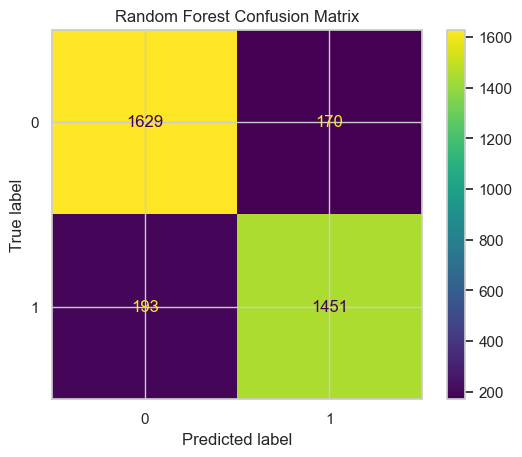

In [113]:
with mlflow.start_run(run_name="Fraud_detection_ML(1)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    # Split the data into train and test split
    X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model one (Random Forest) fit and predict
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc.fit(X1_train, y1_train)
    rf_pred = rfc.predict(X1_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y1_test, rf_pred)  
    precision = precision_score(y1_test, rf_pred, average='weighted', zero_division=1)
    recall = recall_score(y1_test, rf_pred, average='weighted', zero_division=1)
    f1 = f1_score(y1_test, rf_pred, average='weighted', zero_division=1) 
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y1_test, rf_pred, ax= plt.gca())
    plt.title("Random Forest Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>ML Model(2):Logistic Regression

2024/10/20 23:21:38 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: a89295c0036549e1a247174ecb597e6a
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455698506
end_time: None
status: RUNNING


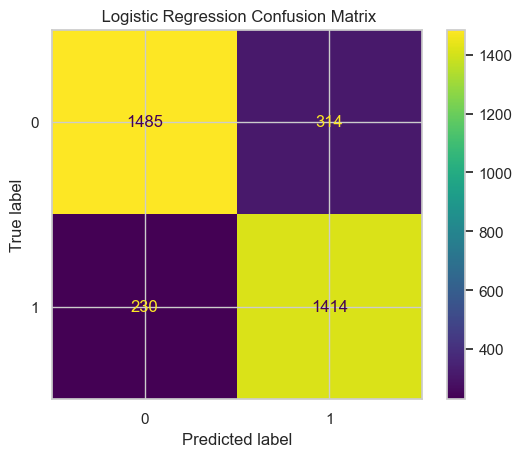

In [114]:
with mlflow.start_run(run_name="Fraud_detection_ML(2)", experiment_id=exp_id) as run:
    runId = run.info.run_id


    # Split the data into train and test split
    X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)   
    
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model two (Logistic Regression) fit and predict
    LR = LogisticRegression()
    LR.fit(X1_train, y1_train)
    LR_pred = LR.predict(X1_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y1_test, LR_pred)  
    precision = precision_score(y1_test, LR_pred, average='weighted', zero_division=1)
    recall = recall_score(y1_test, LR_pred, average='weighted', zero_division=1)
    f1 = f1_score(y1_test, LR_pred, average='weighted', zero_division=1)
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y1_test, LR_pred, ax= plt.gca())
    plt.title(" Logistic Regression Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>ML Model(3):Decision Tree

2024/10/20 23:21:45 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: fee6bdfcf526444a81886336c2be8d97
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455705687
end_time: None
status: RUNNING


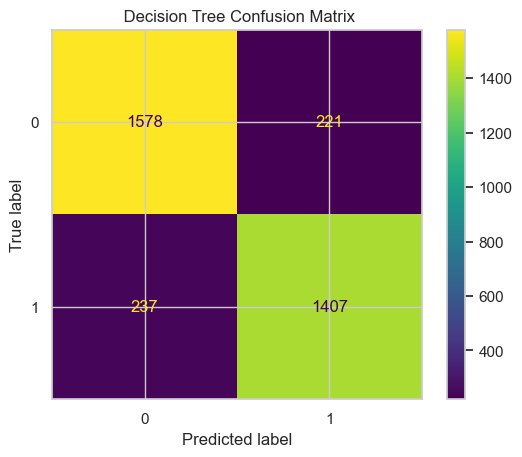

In [115]:
with mlflow.start_run(run_name="Fraud_detection_ML(3)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    # Split the data into train and test split
    X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model two (Decision Tree) fit and predict
    DT = DecisionTreeClassifier()
    DT.fit(X1_train, y1_train)
    DT_pred = DT.predict(X1_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y1_test, DT_pred)
    precision = precision_score(y1_test, DT_pred, average='weighted', zero_division=1)
    recall = recall_score(y1_test, DT_pred, average='weighted', zero_division=1)
    f1 = f1_score(y1_test, DT_pred, average='weighted', zero_division=1)
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y1_test, DT_pred, ax= plt.gca())
    plt.title(" Decision Tree Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>ML Model(4):Bagging

2024/10/20 23:21:56 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: c185e2372674445d9b0c6e52fcc39dc3
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455715868
end_time: None
status: RUNNING


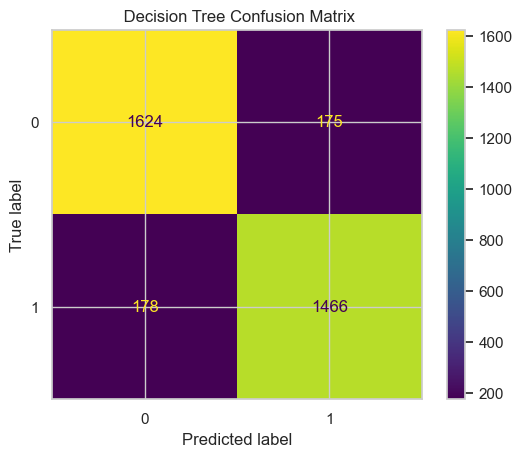

In [116]:
with mlflow.start_run(run_name="Fraud_detection_ML(4)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    # Split the data into train and test split
    X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model two (Decision Tree) fit and predict
    BC = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,random_state=42)
    BC.fit(X1_train, y1_train)
    BC_pred = BC.predict(X1_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y1_test, BC_pred)
    precision = precision_score(y1_test, BC_pred, average='weighted', zero_division=1)
    recall = recall_score(y1_test, BC_pred, average='weighted', zero_division=1)
    f1 = f1_score(y1_test, BC_pred, average='weighted', zero_division=1)
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y1_test, BC_pred, ax= plt.gca())
    plt.title(" Decision Tree Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>ML Model(5):Adaboosting

2024/10/20 23:22:13 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: ab6e128a04e64d6189e89570b4ca3d4e
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455733450
end_time: None
status: RUNNING


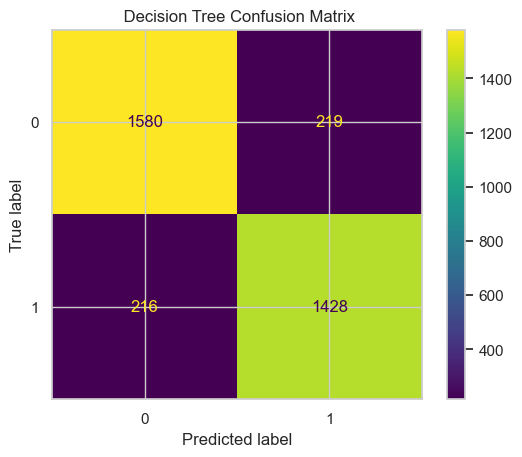

In [117]:
with mlflow.start_run(run_name="Fraud_detection_ML(5)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    

    # Split the data into train and test split
    X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model two (Decision Tree) fit and predict
    ABC = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100,random_state=42)
    ABC.fit(X1_train, y1_train)
    ABC_pred = ABC.predict(X1_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y1_test, ABC_pred)
    precision = precision_score(y1_test, ABC_pred, average='weighted', zero_division=1)
    recall = recall_score(y1_test, ABC_pred, average='weighted', zero_division=1)
    f1 = f1_score(y1_test, ABC_pred, average='weighted', zero_division=1)
    
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y1_test, ABC_pred, ax= plt.gca())
    plt.title(" Decision Tree Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

# Autologing for NLP models

>>Model(1):Logistic Regression

2024/10/20 23:22:46 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: 6fe6f5884a624abcbbd893cda8ea6629
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455750422
end_time: None
status: RUNNING


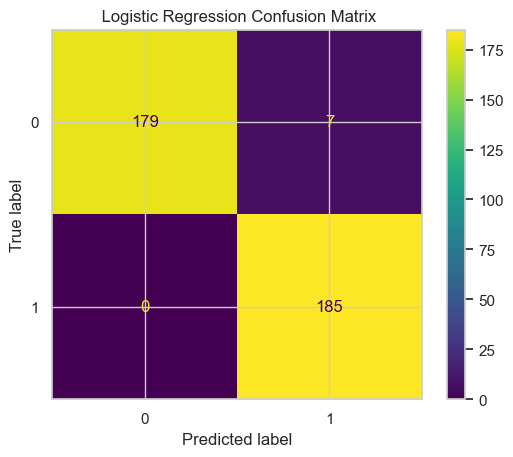

In [118]:
with mlflow.start_run(run_name="Fraud_detection_NLP(1)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model two (Logistic Regression) fit and predict
    LR2 = LogisticRegression(solver = 'liblinear', penalty = 'l1')
    LR2.fit(X_train, y_train)
    LR2_pred = LR2.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, LR2_pred)
    precision = precision_score(y_test, LR2_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, LR2_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, LR2_pred, average='weighted', zero_division=1)
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, LR2_pred, ax= plt.gca())
    plt.title(" Logistic Regression Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>Model(2):SVC

2024/10/20 23:23:11 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: 181607d365f34a6eba1f9a658f0e18f6
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455775810
end_time: None
status: RUNNING


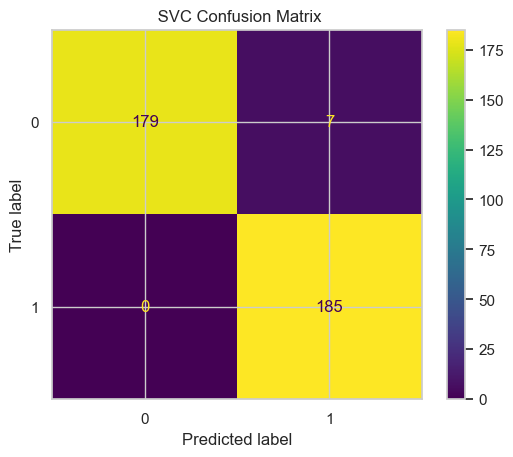

In [119]:
with mlflow.start_run(run_name="Fraud_detection_NLP(2)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model two (SVC) fit and predict
    svc= SVC(kernel= "sigmoid", gamma  = 1.0)
    svc.fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, svc_pred)
    precision = precision_score(y_test, svc_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, svc_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, svc_pred, average='weighted', zero_division=1)
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, svc_pred, ax= plt.gca())
    plt.title(" SVC Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>Model(3):KNN

2024/10/20 23:23:40 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: 35dd55dba7294caf881531eb6e71095d
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455804628
end_time: None
status: RUNNING


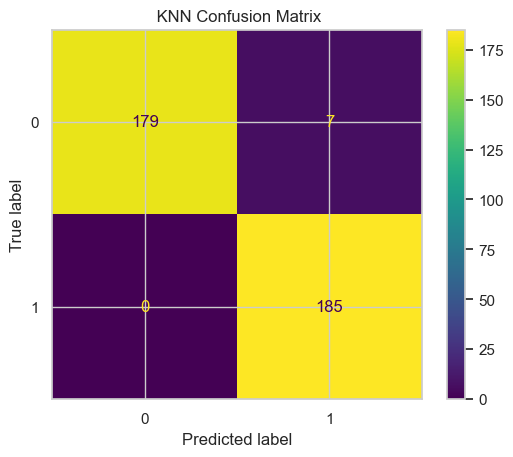

In [120]:
with mlflow.start_run(run_name="Fraud_detection_NLP(3)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model two (Naive Bayes) fit and predict
    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    knc_pred = svc.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, knc_pred)
    precision = precision_score(y_test, knc_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, knc_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, knc_pred, average='weighted', zero_division=1)
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, knc_pred, ax= plt.gca())
    plt.title(" KNN Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>Model(4):Decision Tree

2024/10/20 23:24:01 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: a817940ef2844283a35c6e48e7a137d4
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455827420
end_time: None
status: RUNNING


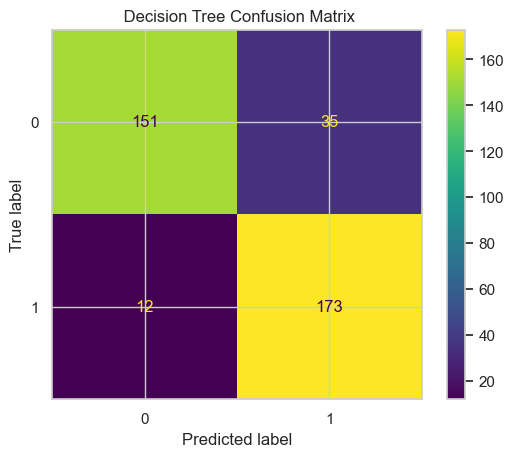

In [121]:
with mlflow.start_run(run_name="Fraud_detection_NLP(4)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model two (Decision Tree) fit and predict
    DT2 = DecisionTreeClassifier(max_depth = 5)
    DT2.fit(X_train, y_train)
    DT2_pred = DT2.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, DT2_pred)
    precision = precision_score(y_test, DT2_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, DT2_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, DT2_pred, average='weighted', zero_division=1)
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, DT2_pred, ax= plt.gca())
    plt.title(" Decision Tree Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>Model(5):Random Forest Classifier

2024/10/20 23:24:23 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: d347e5ab81f746c5961ffefdf6e18b6f
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455849412
end_time: None
status: RUNNING


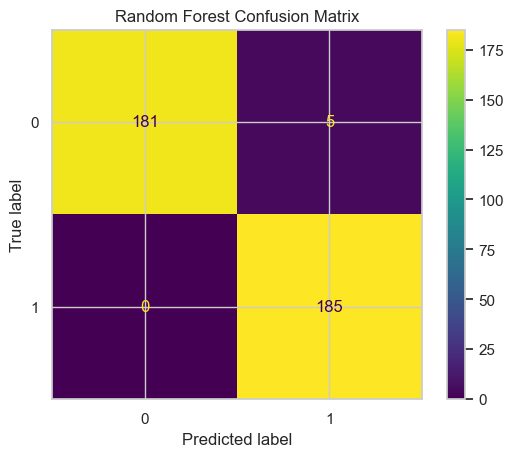

In [122]:
with mlflow.start_run(run_name="Fraud_detection_NLP(5)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model one (Random Forest) fit and predict
    rfc2 = RandomForestClassifier(n_estimators=50, random_state=2)
    rfc2.fit(X_train, y_train)
    rf2_pred = rfc2.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, rf2_pred) 
    precision = precision_score(y_test, rf2_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, rf2_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, rf2_pred, average='weighted', zero_division=1)  
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, rf2_pred, ax= plt.gca())
    plt.title("Random Forest Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>Model(6):Adaboosting classifier

2024/10/20 23:24:45 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: 61af550810904577a7128a6b1afbdfb0
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455872320
end_time: None
status: RUNNING


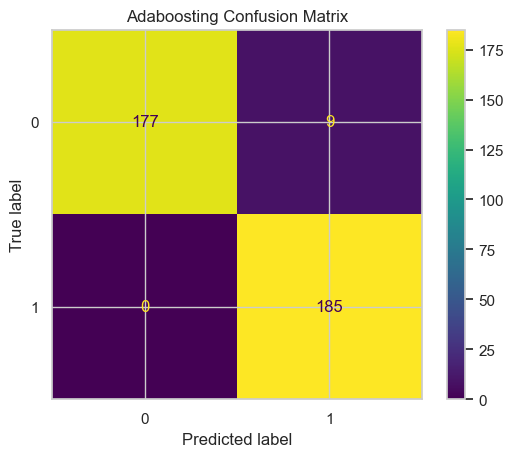

In [123]:
with mlflow.start_run(run_name="Fraud_detection_NLP(6)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model one (Adaboosting) fit and predict
    abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
    abc.fit(X_train, y_train)
    abc_pred = abc.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, abc_pred) 
    precision = precision_score(y_test, abc_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, abc_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, abc_pred, average='weighted', zero_division=1)  
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, abc_pred, ax= plt.gca())
    plt.title("Adaboosting Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>Model(7):Bagging classifier

2024/10/20 23:25:11 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: df3aff5ec4154e42b45cb63753c6bd38
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455896214
end_time: None
status: RUNNING


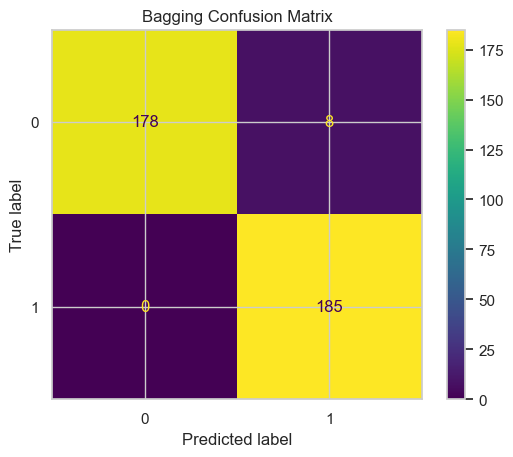

In [124]:
with mlflow.start_run(run_name="Fraud_detection_NLP(7)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model one (Bagging) fit and predict
    bc = BaggingClassifier(n_estimators = 50, random_state = 2)
    bc.fit(X_train, y_train)
    bc_pred = bc.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, bc_pred) 
    precision = precision_score(y_test, bc_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, bc_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, bc_pred, average='weighted', zero_division=1)  
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, bc_pred, ax= plt.gca())
    plt.title("Bagging Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>Model(8):Extra Trees Classifier

2024/10/20 23:25:39 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: 98ba093eb8b345a299545c625298ac77
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455926649
end_time: None
status: RUNNING


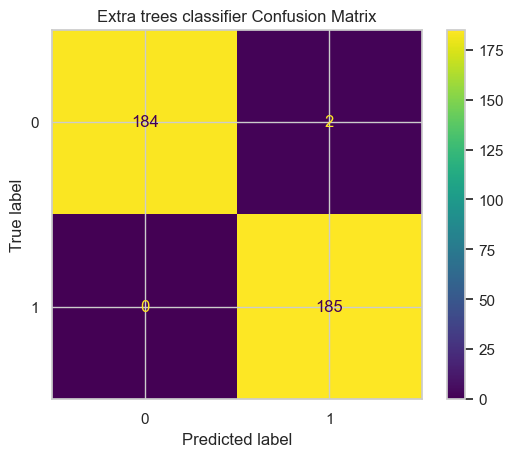

In [125]:
with mlflow.start_run(run_name="Fraud_detection_NLP(8)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model one (Extra trees classifier) fit and predict
    etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
    etc.fit(X_train, y_train)
    etc_pred = etc.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, etc_pred) 
    precision = precision_score(y_test, etc_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, etc_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, etc_pred, average='weighted', zero_division=1)  
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, etc_pred, ax= plt.gca())
    plt.title("Extra trees classifier Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))

>>Model(9):Gradient Boosting Classifier

2024/10/20 23:26:02 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Run Id: 567b5fe3cf374caab08abe048705a62c
Experiment ID: 704558410244063923
Lifecycle_stage: active
start_time: 1729455946731
end_time: None
status: RUNNING


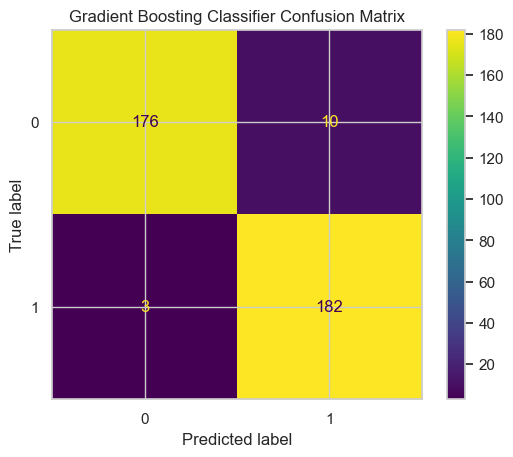

In [126]:
with mlflow.start_run(run_name="Fraud_detection_NLP(9)", experiment_id=exp_id) as run:
    runId = run.info.run_id
    
    
    df2['transformed_text'] = df2['description'].apply(transform_text)
    X = tfid.fit_transform(df2['transformed_text']).toarray()
    y = df2['Is_Fraud'].values

    # Split the data into train and test split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
   
    # Auto log
    mlflow.sklearn.autolog()
    
    # Model one (Gradient Boosting Classifier) fit and predict
    gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
    gbdt.fit(X_train, y_train)
    gbdt_pred = gbdt.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, gbdt_pred) 
    precision = precision_score(y_test, gbdt_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, gbdt_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, gbdt_pred, average='weighted', zero_division=1)  
    
    # log the confusion matrix
    fig = plt.figure()
    disp = ConfusionMatrixDisplay.from_predictions(y_test, gbdt_pred, ax= plt.gca())
    plt.title("Gradient Boosting Classifier Confusion Matrix")
    mlflow.log_figure(fig, "metrics/ConfusionMatix.png")

    
    # experiment info
    print(f"Run Id: {run.info.run_id}")
    print("Experiment ID: {}".format(run.info.experiment_id))
    print("Lifecycle_stage: {}".format(run.info.lifecycle_stage))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("status: {}".format(run.info.status))